# Frequency Domain
SPI2 Basics on Image processing

Ecole Centrale Nantes

Diana Mateus

Participant: Cheng XIANG

## 0. Preparation 

### 0.1 Import the required modules


In [252]:
from scipy import ndimage
import matplotlib.pyplot as plt
import numpy as np
import os
import skimage.io as io
from skimage.transform import resize

### 0.2 Define the main image folder
Make sure the subsequent parts of this notebook refer to this definition IMDIR. **When evaluating your notebook I should only need to change the path here** to run the entire notebook.

In [253]:
IMDIR = "./images/h"
print(os.listdir(IMDIR))



FileNotFoundError: [WinError 3] 系统找不到指定的路径。: './images/h'

### 0.2 Read and display the images
Check that you can read and display all the provided images. Do not include this cell, the code nor its ouput in the final report

In [254]:
width=20
height=15
plt.rcParams['figure.figsize'] = [width, height]
            
fig=plt.figure()

im_counter = 1
for root, dirnames, filenames in os.walk(IMDIR):
    for filename in filenames:
        f = os.path.join(root, filename)
        
        #filter only image files with the following format
        if f.endswith(('.png', '.jpg', '.jpeg','.JPG', '.tif', '.gif')):
            
            # print the paths to current filename if nothing is being found
            # print(filename)
            
            # read the image 
            im = io.imread(f,as_gray=True)
            im = resize(im,(100,100),mode='constant')

            # display it
            plt.subplot(5,7,im_counter)
            plt.imshow(im, cmap='gray')
            plt.title(filename)
            plt.axis('off')
            im_counter +=1 


plt.show()



<Figure size 1440x1080 with 0 Axes>

## 1. The Discrete Fourier Transform




In this exercise we will compute and visualize a DFT using numpy's fft functions:
- ```np.fft.fft2```: computes the two-dimensional FFT of an image.
- ```np.fft.fftshift```: center the frecuencies in the middle of the image
- ```np.fft.ifftshift```: reverses the centering
- ```np.fft.ifft2```: inverse fourier transform
- ```np.real```: takes the real components of a complex number
- ```np.abs```: recovers the magnitude of a complex number
- ```np.angle```: recovers the phase of a complex number 
- ```np.log```: computes the logarithm

The following code uses the above functions applied to the provided images, and shows

**a)** the original image 

**b)** the magnitude of its fft (scaled logarithmically)

**c)** the magnitude of its **centered(shifted)** Discrete Fourier transform fft (scaled logarithmically)

**c)** the inverse fft of the above transformed image (all the steps shouls be reversed)

**d) For each image explain how to interpret the FFT images**


# IMAGES IN FOURIER FOLDER

In [255]:
SUBDIR = IMDIR 


for root, dirnames, filenames in os.walk(SUBDIR):
    # print path to all filenames.
    for filename in filenames:
        f = os.path.join(root, filename)
        if f.endswith(('.png', '.jpg', '.jpeg','.JPG', '.tif', '.gif')):
            print(f)
            im = io.imread(f,as_gray=True)
            #im = resize(im,(100,100),mode='constant') #Uncomment this line if it is too slow
    
            
            # TO EXPLAIN BY STUDENTS
            im_fft = np.fft.fft2(im)      #computes the two-dimensional FFT of an image.
            im_fft_shifted=np.fft.fftshift(im_fft) #  center the frecuencies in the middle of the image
            print(np.shape(im_fft_shifted))   #get the shape
            im_fft_shifted1=im_fft_shifted[:,:] 
            print(np.shape(im_fft_shifted1))  #get the shape           
            im_recon = np.real(np.fft.ifft2(np.fft.ifftshift(im_fft_shifted1))) #reverses the centering and inverse the furier transform and takes the real components 
            # END TO EXPLAIN BY STUDENTS
            
            
            fig=plt.figure(figsize=(16, 18))

            plt.subplot(141)
            plt.title('Original image')
            plt.imshow(im)
            plt.gray()
            plt.axis('off')

            
            plt.subplot(142)
            plt.title('log FFT ')
            plt.imshow(np.log(np.abs(im_fft)))
            plt.gray()
            plt.axis('off')
                        
            plt.subplot(143)
            plt.title('log shift FFT ')
            plt.imshow(np.log(np.abs(im_fft_shifted)))
            plt.gray()
            plt.axis('off')

            
            plt.subplot(144)
            plt.title('Reconstructed image')
            plt.imshow(im_recon)
            plt.gray()
            plt.axis('off')
            
            plt.show()

##  2. PROJECT JPEG

**Introduction**

The jpeg compression follows several steps

**i)** Convert images from RGB to YIQ color space

**ii)** Reduce the size (to half) of the I and Q channels

**iii)** An image is first subdivided in 8x8 subblocks (assuming the original image has sides whose length is a multiple of 8, if it is not the case just resize it).

**iv)** A frequency transformation is computed for each block (computed with a discrete cosine transform DCT II )
```
fftpack.dct(fftpack.dct(im.T, norm='ortho').T, norm='ortho')
```
**v)** The DCT results are then divided by the elements of the the quantization matrices given in ```quantization_table```. The resulting values are then rounded and stored as integers. **Hint:** use the functions  ```round()```, ```astype(np.int32)```

**vi)** The result of quantization (which should have many zeros) is then compressed Run Lenght Coding and Huffman coding to reduce the size. The compressed values are saved together with the quantization table. #won't do

**vii)** The reconstruction of the image implies inverting the encoding, the quantization and the dct.



**Instructions**

- This project is individual! This means both the code and report should be original and different for each of you. The 0 grade will apply for any attempt to break this rule.

- You are expected to return both the jupyter notebook along with a report explaining the method and the results of the jpeg compression on SEVERAL images.


- You are **ONLY** allowed to use:
    - any ``numpy`` and ``matplotlib`` functions 
    - ``io.imread`` to read the images
    - the provided functions to compute the ``dct``  
    - the provided functions to compute the quantization matrix ```quantization_table```. 
    - other functions from ``skimage`` are not needed!!! I will tolerate them only in the case you completely explain in the report (with descriptions and equations)  what this functions do.


- If you use code from an external source, this source should be cited. Failinig to do so, also leads to a grade of 0.


- The first cell of the notebook must start with the definition of the ```filename``` variable, which especifies the path of the image that will be compressed. To test your code on other images, I will only change this line. The code should run adapting to any input image.


- Implement all the jpeg compression steps (i-v) . Do **NOT** implement step vi) Run Lenght Code and Huffman coding


- Create **one function for each step**. Demonstrate the results of each step by calling each function: Show with images or graphs how the input image/list/data looks like before and after applying that function.


- Implement the inverse steps, to go from the quantized dct values to the reconstructed images. Again use one function per step, and illustrate its results


- Create a global jpegCompress function englobing steps i-v and a jpegDecompress function englobin steps in vii)


- Call the jpegCompress and jpeg Decompress function on several images: e.g. before and after applying a gaussian filter, before and after downsizing the image, on images with high or low frequency content. Compare the images (e.g. by computing their differences). Write some comments for every experiment you try. 


- Compare how the frequency representation of the original and the compressed images, look at the spectrum magnitude and phase. You may also want to compare the histogram of the frequency components.

**BONUS** Replace the given DCT function by your own basis implementation. Explain any difference.


In [256]:
import skimage.io as io
import numpy as np
import matplotlib.pyplot as plt
import skimage.transform as skt
from PIL import Image
import os

(346, 518, 3)
0.0196078431372549 1.0
(128, 128, 3)
8.207520644992085 252.93893847647118


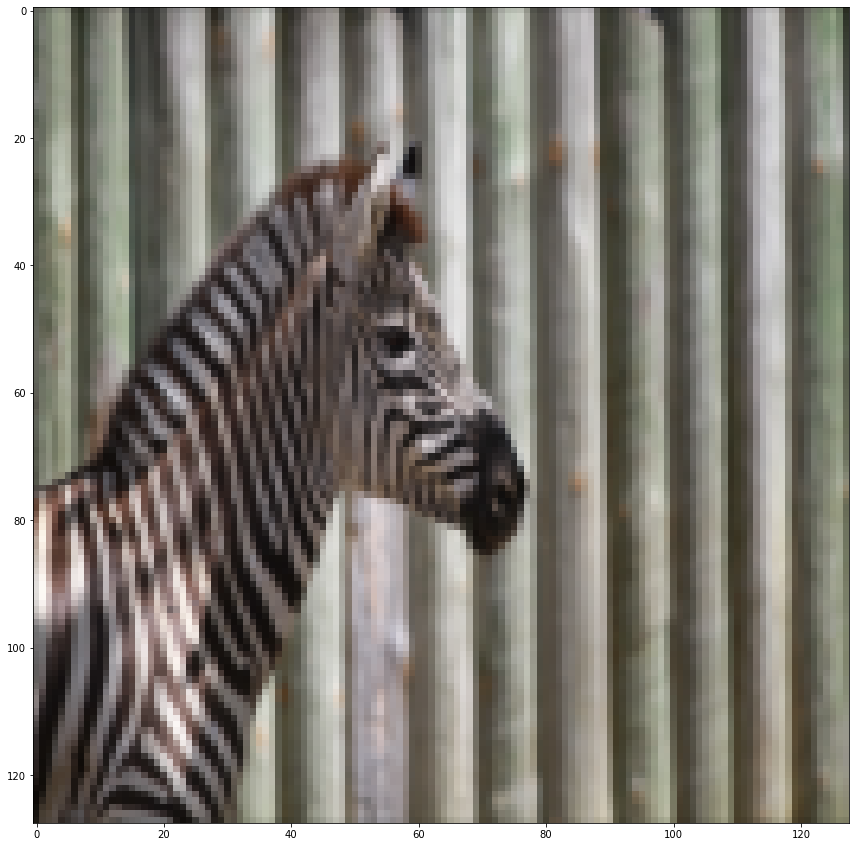

In [257]:
filename = "images/Fourier/zebra-wall.png"
im = io.imread(filename)
im = (im/255).astype(float) #To be sure is always between 0 and 1 after this cell


print(im.shape)
print(im.min(),im.max())

#Resize small first to debug
h = 128
w = 128

#The original function isn't defined, so I import the skimage.transform to resize the original picture
#If I use np.resize(im,(h,2)), the output will be one-dimensional, which is not the desired output
im1 = skt.resize(im,(h,w),mode='constant')*255 #This function will put the intensitites between 0 and 1 -> multiply by 255 when needed

print(im1.shape)
print(im1.min(),im1.max())
plt.imshow(np.uint8(im1))

In [258]:
#ATTENTION The quatization table assumes the original image intensities before the dct are between 0 and 255


from scipy import fftpack

def dct_2d(im):
    return fftpack.dct(fftpack.dct(im.T, norm='ortho').T, norm='ortho')

def idct_2d(im):
    return fftpack.idct(fftpack.idct(im.T, norm='ortho').T, norm='ortho')

def quantization_table(component='lum'):
    # Quantization Table for: Photoshop 
    # (http://www.impulseadventure.com/photo/jpeg-quantization.html)
    if component == 'lum':
        q = np.array([[2, 2, 2, 2, 3, 4, 5, 6],
                      [2, 2, 2, 2, 3, 4, 5, 6],
                      [2, 2, 2, 2, 4, 5, 7, 9],
                      [2, 2, 2, 4, 5, 7, 9, 12],
                      [3, 3, 4, 5, 8, 10, 12, 12],
                      [4, 4, 5, 7, 10, 12, 12, 12],
                      [5, 5, 7, 9, 12, 12, 12, 12],
                      [6, 6, 9, 12, 12, 12, 12, 12]])
    elif component == 'chrom':
        q = np.array([[3, 3, 5, 9, 13, 15, 15, 15],
                      [3, 4, 6, 11, 14, 12, 12, 12],
                      [5, 6, 9, 14, 12, 12, 12, 12],
                      [9, 11, 14, 12, 12, 12, 12, 12],
                      [13, 14, 12, 12, 12, 12, 12, 12],
                      [15, 12, 12, 12, 12, 12, 12, 12],
                      [15, 12, 12, 12, 12, 12, 12, 12],
                      [15, 12, 12, 12, 12, 12, 12, 12]])
    else:
        raise ValueError((
            "component should be either 'lum' or 'chrom', "
            "but '{comp}' was found").format(comp=component))

    return q



In [259]:
# transfer from rgb to yiq function
def rgb2yiq(img):
    yiq_from_rgb = np.array([[0.299, 0.587, 0.114],
                             [0.5959, -0.2746, -0.3213],
                             [0.2115, -0.5227, 0.3112]])
    yiq = np.dot(img[...,:3],yiq_from_rgb)
    #yiq=np.where(yiq < 0, 0, yiq)
    #yiq=np.where(yiq > 1, 1, yiq)
    return yiq     

Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).


The image shape of yiq image is: (128, 128, 3)
The min and max number of yiq image is: -0.19187868236306727 1.0821252904224894


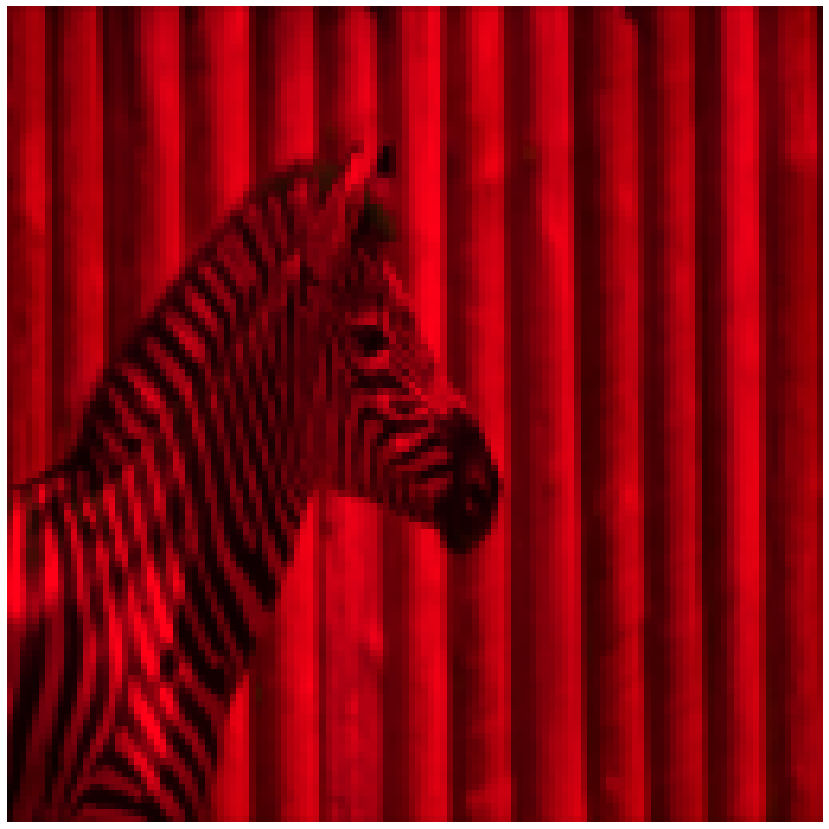

In [315]:
im_yiq = rgb2yiq(im1/255)
plt.imshow(im_yiq)
plt.axis('off')
print("The image shape of yiq image is:",im_yiq.shape)
print("The min and max number of yiq image is:",im_yiq.min(),im_yiq.max())

In [321]:
# reduce the I,Q channel to half function
def reduceIQ(img):
    for i in range(h):
        for j in range(w):
            img[i,j,1]=img[i,j,1]/2
            img[i,j,2]=img[i,j,2]/2
    return img

Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).


The image shape of reduced yiq image is: (128, 128, 3)


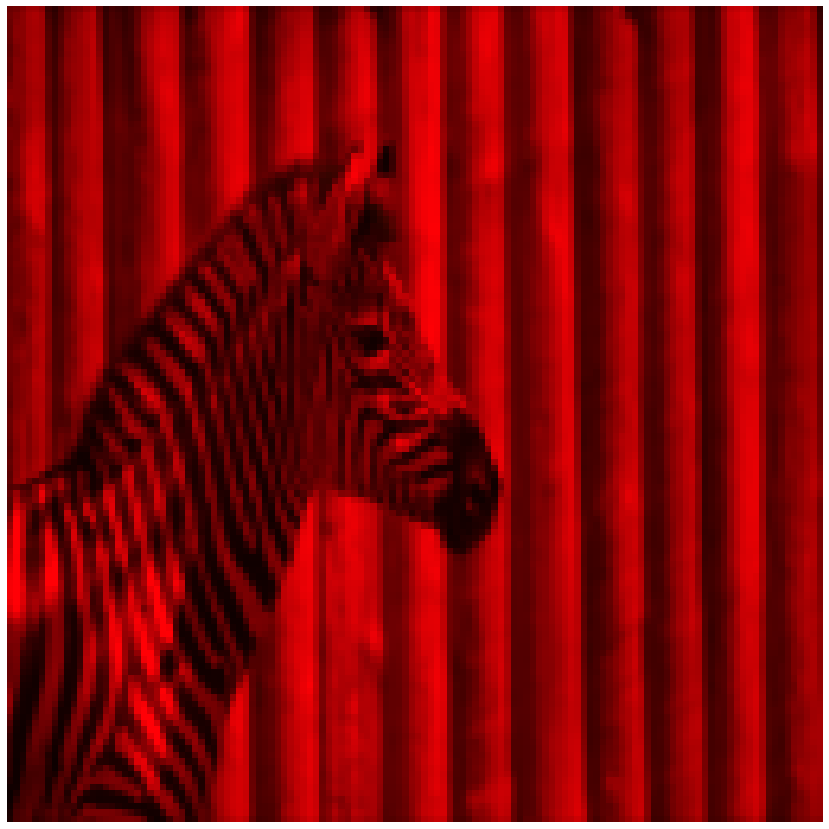

In [322]:
im_yiq_reduced=reduceIQ(im_yiq)
plt.imshow(im_yiq_reduced)
plt.axis('off')
print("The image shape of reduced yiq image is:",im_yiq_reduced.shape)

Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).
Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).


(128, 128, 3)
8.207520644992085 252.93893847647118
(128, 128, 3)
-0.09593934118153363 1.0821252904224894
(128, 128, 3)
-0.09593934118153363 1.0821252904224894


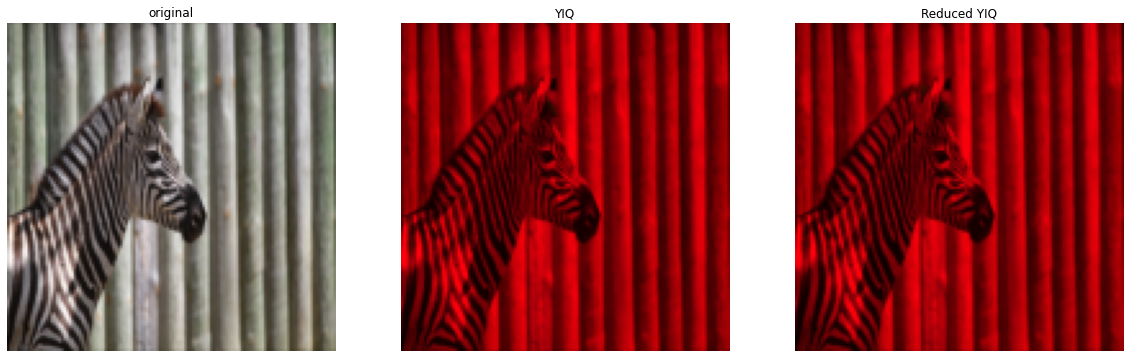

In [263]:
plt.subplot(1, 3, 1)
plt.title('original')
plt.imshow(np.uint8(im1))
plt.axis('off')
print(im1.shape)
print(im1.min(),im1.max())

plt.subplot(1, 3, 2)
plt.title('YIQ')
plt.imshow(im_yiq)
plt.axis('off')
print(im_yiq.shape)
print(im_yiq.min(),im_yiq.max())

plt.subplot(1, 3, 3)
plt.title('Reduced YIQ')
plt.imshow(im_yiq_reduced)
plt.axis('off')
print(im_yiq_reduced.shape)
print(im_yiq_reduced.min(),im_yiq_reduced.max())

#os.mkdir("F:\Python codes\SPI2\LAB3-PROJECT\images\Fourier\Sub_images")  # creat a new file to store the cropped images

In [293]:
# subdivided in 8x8 subblocks
def subdivided8x8(img):
    im=np.zeros((8,8,3))
    for i in range(int(h/8)):  # 0-15
        for j in range(int(w/8)):  # 0-15
            im = img[i*8:(i+1)*8, j*8:(j+1)*8, :]
            io.imsave('F:\Python codes\SPI2\LAB3-PROJECT\images\Fourier\Sub_images\subim{}_{}.png'.format(i, j),im.astype(float))
    return im

In [294]:
img_divided=subdivided8x8(im_yiq_reduced)
print(img_divided.shape)
print(img_divided.min(),img_divided.max())

<ipython-input-293-fe02ab16de25>:7: UserWarning: F:\Python codes\SPI2\LAB3-PROJECT\images\Fourier\Sub_images\subim0_0.png is a low contrast image
  io.imsave('F:\Python codes\SPI2\LAB3-PROJECT\images\Fourier\Sub_images\subim{}_{}.png'.format(i, j),im.astype(float))
Lossy conversion from float64 to uint8. Range [-0.05352049137402345, 0.6728184388147886]. Convert image to uint8 prior to saving to suppress this warning.
<ipython-input-293-fe02ab16de25>:7: UserWarning: F:\Python codes\SPI2\LAB3-PROJECT\images\Fourier\Sub_images\subim0_1.png is a low contrast image
  io.imsave('F:\Python codes\SPI2\LAB3-PROJECT\images\Fourier\Sub_images\subim{}_{}.png'.format(i, j),im.astype(float))
Lossy conversion from float64 to uint8. Range [-0.06066475261640102, 0.7391999317325526]. Convert image to uint8 prior to saving to suppress this warning.
<ipython-input-293-fe02ab16de25>:7: UserWarning: F:\Python codes\SPI2\LAB3-PROJECT\images\Fourier\Sub_images\subim0_2.png is a low contrast image
  io.imsave(

<ipython-input-293-fe02ab16de25>:7: UserWarning: F:\Python codes\SPI2\LAB3-PROJECT\images\Fourier\Sub_images\subim1_5.png is a low contrast image
  io.imsave('F:\Python codes\SPI2\LAB3-PROJECT\images\Fourier\Sub_images\subim{}_{}.png'.format(i, j),im.astype(float))
Lossy conversion from float64 to uint8. Range [-0.08021752659007796, 0.8642875397879162]. Convert image to uint8 prior to saving to suppress this warning.
<ipython-input-293-fe02ab16de25>:7: UserWarning: F:\Python codes\SPI2\LAB3-PROJECT\images\Fourier\Sub_images\subim1_6.png is a low contrast image
  io.imsave('F:\Python codes\SPI2\LAB3-PROJECT\images\Fourier\Sub_images\subim{}_{}.png'.format(i, j),im.astype(float))
Lossy conversion from float64 to uint8. Range [-0.0848637751107692, 0.8881678130744561]. Convert image to uint8 prior to saving to suppress this warning.
<ipython-input-293-fe02ab16de25>:7: UserWarning: F:\Python codes\SPI2\LAB3-PROJECT\images\Fourier\Sub_images\subim1_7.png is a low contrast image
  io.imsave('

Lossy conversion from float64 to uint8. Range [-0.08394658979251633, 0.9103222293821296]. Convert image to uint8 prior to saving to suppress this warning.
<ipython-input-293-fe02ab16de25>:7: UserWarning: F:\Python codes\SPI2\LAB3-PROJECT\images\Fourier\Sub_images\subim2_10.png is a low contrast image
  io.imsave('F:\Python codes\SPI2\LAB3-PROJECT\images\Fourier\Sub_images\subim{}_{}.png'.format(i, j),im.astype(float))
Lossy conversion from float64 to uint8. Range [-0.07918756336013286, 0.9043278719930858]. Convert image to uint8 prior to saving to suppress this warning.
<ipython-input-293-fe02ab16de25>:7: UserWarning: F:\Python codes\SPI2\LAB3-PROJECT\images\Fourier\Sub_images\subim2_11.png is a low contrast image
  io.imsave('F:\Python codes\SPI2\LAB3-PROJECT\images\Fourier\Sub_images\subim{}_{}.png'.format(i, j),im.astype(float))
Lossy conversion from float64 to uint8. Range [-0.05891424908495056, 0.6871077356646778]. Convert image to uint8 prior to saving to suppress this warning.
<

<ipython-input-293-fe02ab16de25>:7: UserWarning: F:\Python codes\SPI2\LAB3-PROJECT\images\Fourier\Sub_images\subim3_14.png is a low contrast image
  io.imsave('F:\Python codes\SPI2\LAB3-PROJECT\images\Fourier\Sub_images\subim{}_{}.png'.format(i, j),im.astype(float))
Lossy conversion from float64 to uint8. Range [-0.08939659546627442, 0.9131881654030609]. Convert image to uint8 prior to saving to suppress this warning.
<ipython-input-293-fe02ab16de25>:7: UserWarning: F:\Python codes\SPI2\LAB3-PROJECT\images\Fourier\Sub_images\subim3_15.png is a low contrast image
  io.imsave('F:\Python codes\SPI2\LAB3-PROJECT\images\Fourier\Sub_images\subim{}_{}.png'.format(i, j),im.astype(float))
Lossy conversion from float64 to uint8. Range [-0.05899515428601962, 0.6950560558655712]. Convert image to uint8 prior to saving to suppress this warning.
Lossy conversion from float64 to uint8. Range [-0.0694063100217728, 0.8298770799420905]. Convert image to uint8 prior to saving to suppress this warning.
<i

Lossy conversion from float64 to uint8. Range [-0.07268105175627904, 0.8329526787520696]. Convert image to uint8 prior to saving to suppress this warning.
<ipython-input-293-fe02ab16de25>:7: UserWarning: F:\Python codes\SPI2\LAB3-PROJECT\images\Fourier\Sub_images\subim5_4.png is a low contrast image
  io.imsave('F:\Python codes\SPI2\LAB3-PROJECT\images\Fourier\Sub_images\subim{}_{}.png'.format(i, j),im.astype(float))
Lossy conversion from float64 to uint8. Range [-0.053558756720730696, 0.5651530828442095]. Convert image to uint8 prior to saving to suppress this warning.
<ipython-input-293-fe02ab16de25>:7: UserWarning: F:\Python codes\SPI2\LAB3-PROJECT\images\Fourier\Sub_images\subim5_5.png is a low contrast image
  io.imsave('F:\Python codes\SPI2\LAB3-PROJECT\images\Fourier\Sub_images\subim{}_{}.png'.format(i, j),im.astype(float))
Lossy conversion from float64 to uint8. Range [-0.03645828362590803, 0.6687090081619896]. Convert image to uint8 prior to saving to suppress this warning.
<i

<ipython-input-293-fe02ab16de25>:7: UserWarning: F:\Python codes\SPI2\LAB3-PROJECT\images\Fourier\Sub_images\subim6_8.png is a low contrast image
  io.imsave('F:\Python codes\SPI2\LAB3-PROJECT\images\Fourier\Sub_images\subim{}_{}.png'.format(i, j),im.astype(float))
Lossy conversion from float64 to uint8. Range [-0.09452308928708114, 0.9951320255429026]. Convert image to uint8 prior to saving to suppress this warning.
<ipython-input-293-fe02ab16de25>:7: UserWarning: F:\Python codes\SPI2\LAB3-PROJECT\images\Fourier\Sub_images\subim6_9.png is a low contrast image
  io.imsave('F:\Python codes\SPI2\LAB3-PROJECT\images\Fourier\Sub_images\subim{}_{}.png'.format(i, j),im.astype(float))
Lossy conversion from float64 to uint8. Range [-0.08095081806489547, 0.8605191403939169]. Convert image to uint8 prior to saving to suppress this warning.
<ipython-input-293-fe02ab16de25>:7: UserWarning: F:\Python codes\SPI2\LAB3-PROJECT\images\Fourier\Sub_images\subim6_10.png is a low contrast image
  io.imsave

<ipython-input-293-fe02ab16de25>:7: UserWarning: F:\Python codes\SPI2\LAB3-PROJECT\images\Fourier\Sub_images\subim7_13.png is a low contrast image
  io.imsave('F:\Python codes\SPI2\LAB3-PROJECT\images\Fourier\Sub_images\subim{}_{}.png'.format(i, j),im.astype(float))
Lossy conversion from float64 to uint8. Range [-0.06725573249145636, 0.7846428224814762]. Convert image to uint8 prior to saving to suppress this warning.
<ipython-input-293-fe02ab16de25>:7: UserWarning: F:\Python codes\SPI2\LAB3-PROJECT\images\Fourier\Sub_images\subim7_14.png is a low contrast image
  io.imsave('F:\Python codes\SPI2\LAB3-PROJECT\images\Fourier\Sub_images\subim{}_{}.png'.format(i, j),im.astype(float))
Lossy conversion from float64 to uint8. Range [-0.07715372576875414, 0.8690367316438674]. Convert image to uint8 prior to saving to suppress this warning.
<ipython-input-293-fe02ab16de25>:7: UserWarning: F:\Python codes\SPI2\LAB3-PROJECT\images\Fourier\Sub_images\subim7_15.png is a low contrast image
  io.imsa

<ipython-input-293-fe02ab16de25>:7: UserWarning: F:\Python codes\SPI2\LAB3-PROJECT\images\Fourier\Sub_images\subim9_4.png is a low contrast image
  io.imsave('F:\Python codes\SPI2\LAB3-PROJECT\images\Fourier\Sub_images\subim{}_{}.png'.format(i, j),im.astype(float))
Lossy conversion from float64 to uint8. Range [-0.04448315932595149, 0.5072142255100904]. Convert image to uint8 prior to saving to suppress this warning.
Lossy conversion from float64 to uint8. Range [-0.08238072345803801, 0.9356486720059362]. Convert image to uint8 prior to saving to suppress this warning.
<ipython-input-293-fe02ab16de25>:7: UserWarning: F:\Python codes\SPI2\LAB3-PROJECT\images\Fourier\Sub_images\subim9_6.png is a low contrast image
  io.imsave('F:\Python codes\SPI2\LAB3-PROJECT\images\Fourier\Sub_images\subim{}_{}.png'.format(i, j),im.astype(float))
Lossy conversion from float64 to uint8. Range [-0.08177449677160416, 0.9430801514642204]. Convert image to uint8 prior to saving to suppress this warning.
<ip

<ipython-input-293-fe02ab16de25>:7: UserWarning: F:\Python codes\SPI2\LAB3-PROJECT\images\Fourier\Sub_images\subim10_14.png is a low contrast image
  io.imsave('F:\Python codes\SPI2\LAB3-PROJECT\images\Fourier\Sub_images\subim{}_{}.png'.format(i, j),im.astype(float))
Lossy conversion from float64 to uint8. Range [-0.07236517853315419, 0.8965426057373767]. Convert image to uint8 prior to saving to suppress this warning.
<ipython-input-293-fe02ab16de25>:7: UserWarning: F:\Python codes\SPI2\LAB3-PROJECT\images\Fourier\Sub_images\subim10_15.png is a low contrast image
  io.imsave('F:\Python codes\SPI2\LAB3-PROJECT\images\Fourier\Sub_images\subim{}_{}.png'.format(i, j),im.astype(float))
Lossy conversion from float64 to uint8. Range [-0.05848875717550611, 0.7202186860148263]. Convert image to uint8 prior to saving to suppress this warning.
<ipython-input-293-fe02ab16de25>:7: UserWarning: F:\Python codes\SPI2\LAB3-PROJECT\images\Fourier\Sub_images\subim11_0.png is a low contrast image
  io.im

<ipython-input-293-fe02ab16de25>:7: UserWarning: F:\Python codes\SPI2\LAB3-PROJECT\images\Fourier\Sub_images\subim12_6.png is a low contrast image
  io.imsave('F:\Python codes\SPI2\LAB3-PROJECT\images\Fourier\Sub_images\subim{}_{}.png'.format(i, j),im.astype(float))
Lossy conversion from float64 to uint8. Range [-0.07753419513550669, 0.860554604192307]. Convert image to uint8 prior to saving to suppress this warning.
<ipython-input-293-fe02ab16de25>:7: UserWarning: F:\Python codes\SPI2\LAB3-PROJECT\images\Fourier\Sub_images\subim12_7.png is a low contrast image
  io.imsave('F:\Python codes\SPI2\LAB3-PROJECT\images\Fourier\Sub_images\subim{}_{}.png'.format(i, j),im.astype(float))
Lossy conversion from float64 to uint8. Range [-0.09060527333851898, 0.9257951445628619]. Convert image to uint8 prior to saving to suppress this warning.
<ipython-input-293-fe02ab16de25>:7: UserWarning: F:\Python codes\SPI2\LAB3-PROJECT\images\Fourier\Sub_images\subim12_8.png is a low contrast image
  io.imsav

<ipython-input-293-fe02ab16de25>:7: UserWarning: F:\Python codes\SPI2\LAB3-PROJECT\images\Fourier\Sub_images\subim13_12.png is a low contrast image
  io.imsave('F:\Python codes\SPI2\LAB3-PROJECT\images\Fourier\Sub_images\subim{}_{}.png'.format(i, j),im.astype(float))
Lossy conversion from float64 to uint8. Range [-0.06606313505000792, 0.792615711146192]. Convert image to uint8 prior to saving to suppress this warning.
<ipython-input-293-fe02ab16de25>:7: UserWarning: F:\Python codes\SPI2\LAB3-PROJECT\images\Fourier\Sub_images\subim13_13.png is a low contrast image
  io.imsave('F:\Python codes\SPI2\LAB3-PROJECT\images\Fourier\Sub_images\subim{}_{}.png'.format(i, j),im.astype(float))
Lossy conversion from float64 to uint8. Range [-0.05354523698910234, 0.7205766888201303]. Convert image to uint8 prior to saving to suppress this warning.
<ipython-input-293-fe02ab16de25>:7: UserWarning: F:\Python codes\SPI2\LAB3-PROJECT\images\Fourier\Sub_images\subim13_14.png is a low contrast image
  io.im

Lossy conversion from float64 to uint8. Range [-0.07583512608581938, 0.8943928003538162]. Convert image to uint8 prior to saving to suppress this warning.
<ipython-input-293-fe02ab16de25>:7: UserWarning: F:\Python codes\SPI2\LAB3-PROJECT\images\Fourier\Sub_images\subim15_3.png is a low contrast image
  io.imsave('F:\Python codes\SPI2\LAB3-PROJECT\images\Fourier\Sub_images\subim{}_{}.png'.format(i, j),im.astype(float))
Lossy conversion from float64 to uint8. Range [-0.05057590681521361, 0.5791242499367211]. Convert image to uint8 prior to saving to suppress this warning.
<ipython-input-293-fe02ab16de25>:7: UserWarning: F:\Python codes\SPI2\LAB3-PROJECT\images\Fourier\Sub_images\subim15_4.png is a low contrast image
  io.imsave('F:\Python codes\SPI2\LAB3-PROJECT\images\Fourier\Sub_images\subim{}_{}.png'.format(i, j),im.astype(float))
Lossy conversion from float64 to uint8. Range [-0.0679875820846279, 0.8306590257954509]. Convert image to uint8 prior to saving to suppress this warning.
<i

(8, 8, 3)
-0.04578513618084317 0.6575056656281222


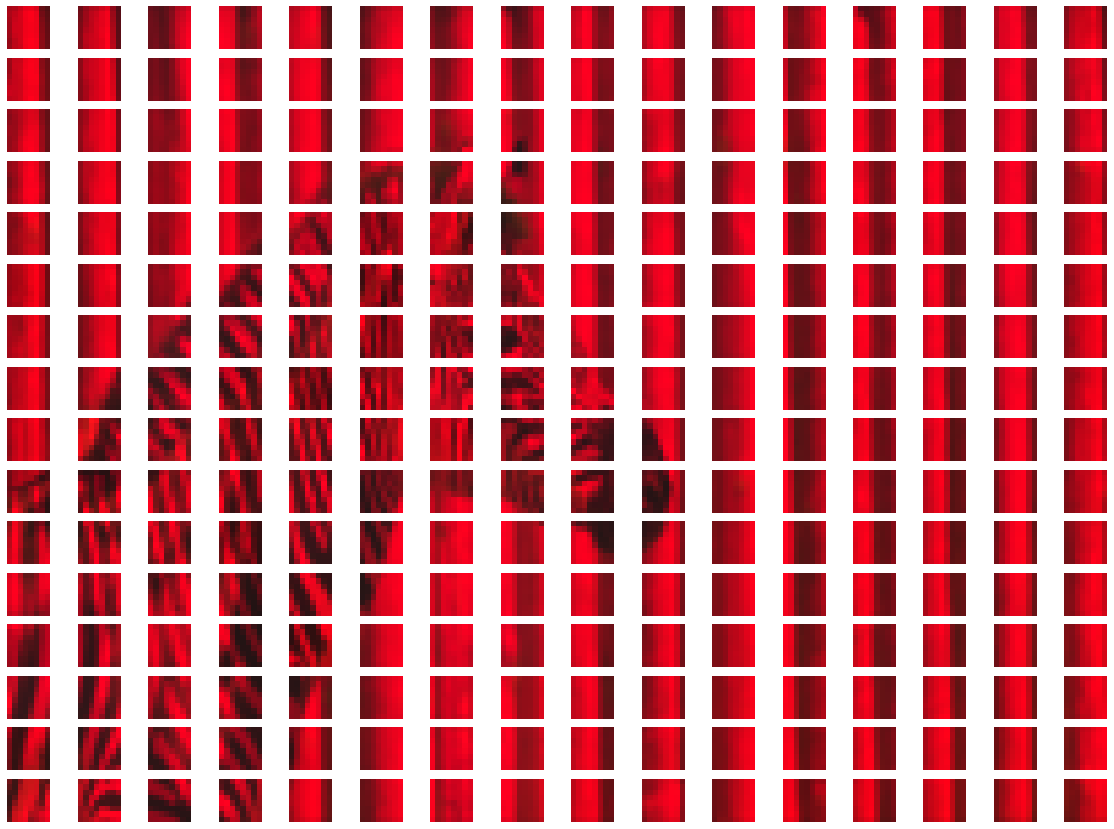

In [295]:
# show the sub divided images
im_counter=1
for i in range(int(h/8)):
    for j in range(int(w/8)):
        filename = "F:\Python codes\SPI2\LAB3-PROJECT\images\Fourier\Sub_images\subim"+str(i)+"_"+str(j)+".png"
        im = io.imread(filename)
        plt.subplot(16,16,im_counter)
        plt.imshow(im)
        plt.axis('off')
        im_counter +=1   

In [302]:
# fft for sub images function
def fft4sub_img():     
    im_counter=1
    d = np.zeros((256, 8, 8, 3))
    for i in range(int(h/8)):
        for j in range(int(w/8)):
            filename = "F:\Python codes\SPI2\LAB3-PROJECT\images\Fourier\Sub_images\subim"+str(i)+"_"+str(j)+".png"
            im = io.imread(filename)
            im=im.astype(np.uint8)
            fft_img=dct_2d(im)
            plt.subplot(16,16,im_counter)            
            plt.imshow(fft_img)
            plt.axis('off')
            d[im_counter-1]=fft_img # store 8*8*3 sub image into a 4 dimentional matrix
            im_counter +=1
    return  d

Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).
Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).
Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).
Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).
Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).
Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).
Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).
Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).
Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).
Clipping i

Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).
Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).
Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).
Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).
Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).
Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).
Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).
Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).
Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).
Clipping i

Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).
Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).
Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).
Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).
Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).
Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).
Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).
Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).
Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).
Clipping i

Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).
Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).
Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).
Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).
Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).
Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).
Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).
Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).
Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).
Clipping i

(256, 8, 8, 3)


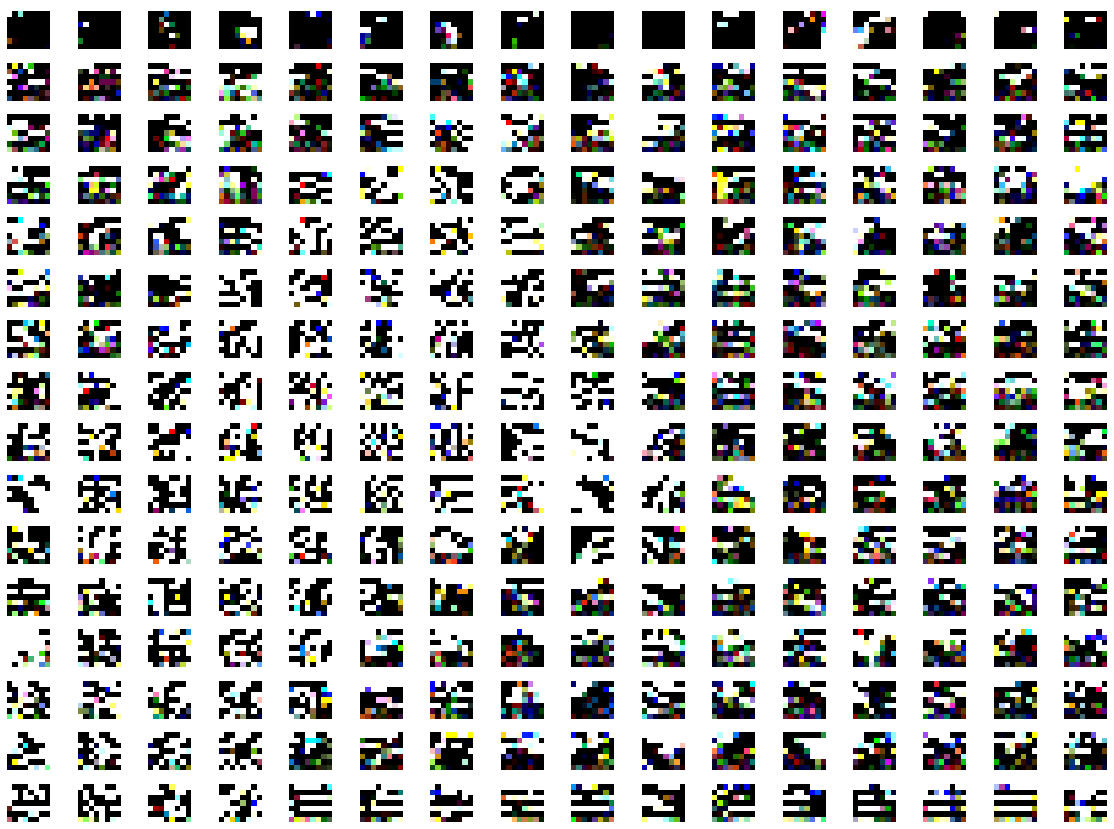

In [303]:
d= fft4sub_img() 
print(d.shape)

In [305]:
print(d.shape[0])

256


In [269]:
# quantilization function
def quantilization(dct):
    k = np.zeros((8, 8, 3))
    for i in range(dct.shape[0]):
        k[:, :, 0] = dct[:, :, 0]/quantization_table(component = 'lum')
        k[:, :, 1] = dct[:, :, 1]/quantization_table(component = 'chrom')
        k[:, :, 2] = dct[:, :, 2]/quantization_table(component = 'chrom')        
    return k

In [270]:
img_qua = quantilization(dct).astype(np.int32)

In [271]:
# inverse quantilization function
def i_quantilization(i_dct):
    k = np.zeros((8, 8, 3))
    for i in range(dct.shape[0]):
        k[:, :, 0] = dct[:, :, 0]*quantization_table(component = 'lum')
        k[:, :, 1] = dct[:, :, 1]*quantization_table(component = 'chrom')
        k[:, :, 2] = dct[:, :, 2]*quantization_table(component = 'chrom')        
    return k    

In [272]:
img_iqua = i_quantilization(img_qua).astype(np.int32)

In [291]:
# ifft for sub images
def ifft4sub_img(dct):  
    i_d = np.zeros((256, 8, 8, 3))
    ifft_img=np.zeros((8, 8, 3))
    k=0
    for i in range(dct.shape[0]): #0-255
            ifft_img=idct_2d(dct[i])
            i_d[k] = ifft_img
            k=k+1
    return i_d

In [ ]:
# assemble the images function
def i_subdivided8x8():
    im=np.zeros((h,w,3))
    for i in range(int(h/8)):  # 0-15
        for j in range(int(w/8)):  # 0-15
            filename = "F:\Python codes\SPI2\LAB3-PROJECT\images\Fourier\Sub_images\subim"+str(i)+"_"+str(j)+".png"
            sub_im = io.imread(filename)
            im[i*8:(i+1)*8, j*8:(j+1)*8, :]= sub_im
    return im.astype('uint8')

Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).


(-0.5, 127.5, 127.5, -0.5)

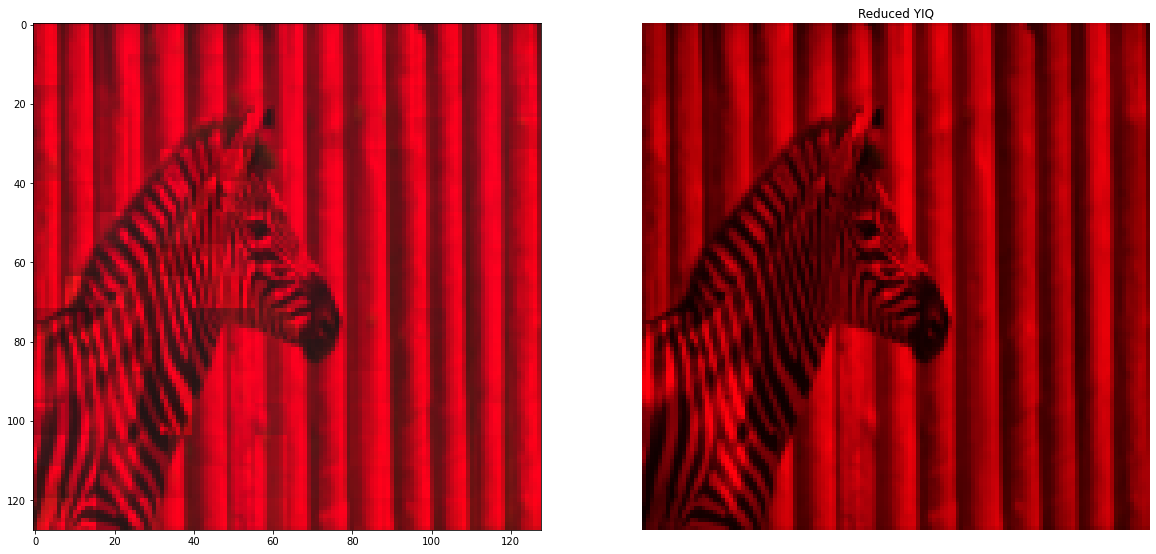

In [316]:
im_ass=i_subdivided8x8()
plt.subplot(1, 2, 1)
plt.imshow(im_ass)
#print(im_as.shape)
#print(im_as.min(),im_as.max())

plt.subplot(1, 2, 2)
plt.title('Reduced YIQ')
plt.imshow(im_yiq_reduced)
plt.axis('off')

In [308]:
# double the I,Q channel 
def i_reduceIQ(img):
    for i in range(h):
        for j in range(w):
            img[i,j,1]=img[i,j,1]*2
            img[i,j,2]=img[i,j,2]*2
    return img

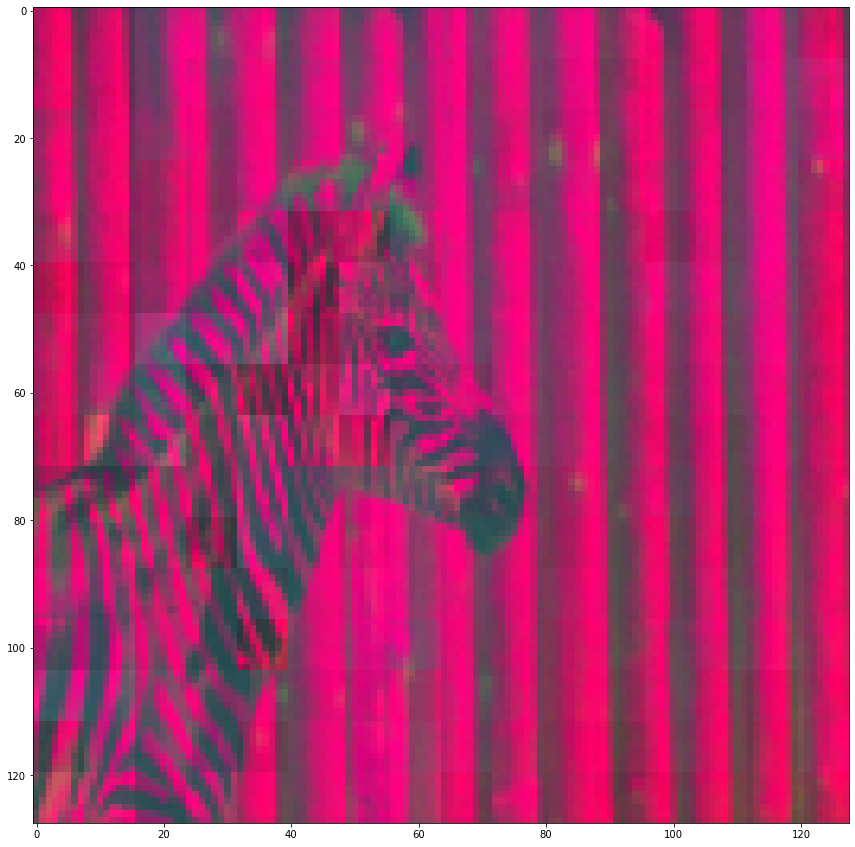

In [310]:
img_dob=i_reduceIQ(im_ass)
plt.imshow(im_ass)

In [311]:
# transfer from yiq to rgb function
def yiq2rgb(img):
    yiq = np.float32(img)
    print(yiq)
    rgb_from_yiq = np.array([[1, 0.956, 0.619],      
                             [1, -0.272, -0.647],
                             [1,-1.106,1.703]])
 
    rgb = np.dot(yiq[...,:3],rgb_from_yiq)
    return rgb                           # np.clip(rgb,0,1).astype(np.float32)

Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).


[[[165.  28.  96.]
  [175.  24.  96.]
  [200.  16.  96.]
  ...
  [220.  16.  96.]
  [175.  28.  88.]
  [ 80.  64.  84.]]

 [[172.  24.  96.]
  [192.  16.  96.]
  [211.  12.  96.]
  ...
  [235.   8.  96.]
  [191.  24.  88.]
  [ 88.  60.  84.]]

 [[166.  24.  92.]
  [199.  16. 100.]
  [211.  12.  96.]
  ...
  [229.   8.  96.]
  [194.  20.  92.]
  [ 93.  60.  84.]]

 ...

 [[ 66.  76.  80.]
  [173.  72.  96.]
  [196.  88.  96.]
  ...
  [202.  28.  84.]
  [232.  24.  84.]
  [228.  20.  88.]]

 [[ 83.  76.  84.]
  [199.  68. 100.]
  [222.  68. 104.]
  ...
  [203.  32.  80.]
  [230.  28.  84.]
  [227.  24.  84.]]

 [[ 94.  76.  84.]
  [203.  60. 100.]
  [224.  52. 108.]
  ...
  [194.  32.  80.]
  [213.  28.  80.]
  [210.  28.  80.]]]


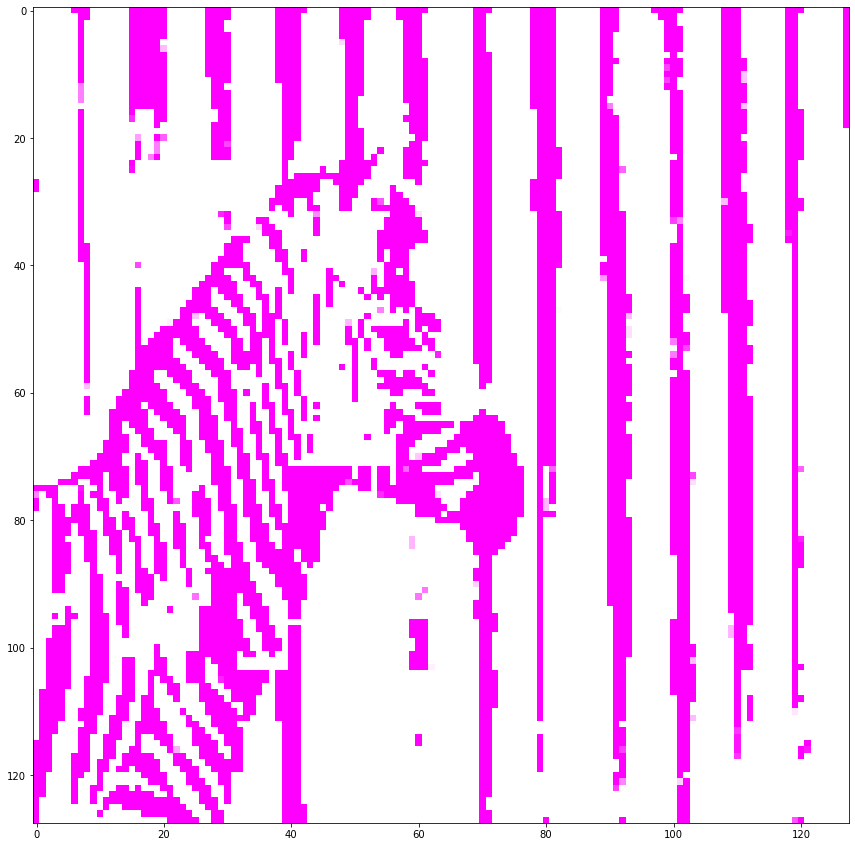

In [313]:
im_rgb = yiq2rgb(img_dob)
plt.imshow(im_rgb)